In [1]:
import numpy as np
import pandas as pd

In [2]:
# read the test data
test1 = pd.read_csv("test.csv", nrows = 8000)

# create 2 datasets (one for every single category)
x = test1[test1['gender'].notnull() & (test1['gender'] == 1)]
x1 = test1[test1['gender'].notnull() & (test1['gender'] == 0)]

# keep only a portion
x = x[0:1000]
x1 = x1[0:1000]

# apppend and create the train dataset
test = x.append(x1)

In [3]:
# read the train data and create the final train data set
train1 = pd.read_csv("imdb4p5.csv", nrows = 10000)

x = train1[train1['gender'].notnull() & (train1['gender'] == 1)]
x1 = train1[train1['gender'].notnull() & (train1['gender'] == 0)]

# keep only a portion
x = x[0:4000]
x1 = x1[0:4000]

# apppend and create the train dataset
train = x.append(x1)

In [4]:
y_test = test.iloc[:, 1]
y_train = train.iloc[:, 1]
x_test = test.iloc[:, 3:]
x_train = train.iloc[:, 3:]

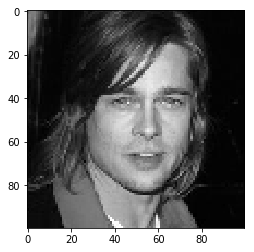

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

image = x_train.iloc[9,:]
image = image.values.reshape(100,100)
plt.imshow(image,cmap = 'gray')
plt.show()

In [7]:
# Step 1. Import the model you want to use
from sklearn.linear_model import LogisticRegression

# Step 2. Make an instance of the Model
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [8]:
%%time
# Step 3. Training the model on the data, storing the information learned from the data
logisticRegr.fit(x_train, y_train)

Wall time: 9min 36s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

In [10]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print("The accuracy of the logistic regression model is:", score*100)

The accuracy of the logistic regression model is: 73.4


In [12]:
# Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[745 255]
 [277 723]]
